In [70]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## Operadores de Pixel: Algoritmo White-Patch
Implementar el algoritmo White-Patch para librarnos de las diferencias de color de iluminación.

### Imágenes de entrada

In [71]:
TEST_IMAGE_ROOT_PATH = "imgs/white_patch/"
TEST_IMAGES_FILENAMES = ["test_blue.png", "test_green.png", "test_red.png"]

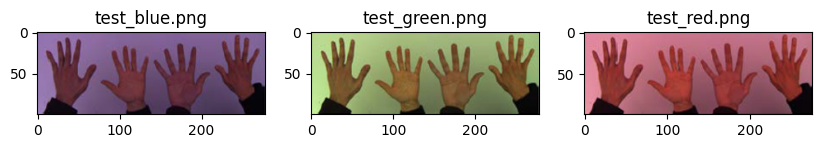

In [72]:
fig, axs = plt.subplots(nrows=1, ncols=len(TEST_IMAGES_FILENAMES))
fig.set_size_inches(10, 5)
for ax, img_file in zip(axs, TEST_IMAGES_FILENAMES):
    raw_img = mpimg.imread(TEST_IMAGE_ROOT_PATH + img_file)
    ax.imshow(raw_img)
    ax.set_title(img_file)

### Implementación del algoritmo

In [73]:
def white_patch(image: np.ndarray, percentile: int = 100) -> np.ndarray:
    """Normalize each color channel with its maximum value"""
    new_img = np.zeros(shape=image.shape)
    for color_chn in range(3):
        new_img[:, :, color_chn] = (
            image[:, :, color_chn] / np.percentile(image[:, :, color_chn], percentile)
        ).clip(0, 1)
    return new_img

### Evaluación del algoritmo con imágenes de prueba

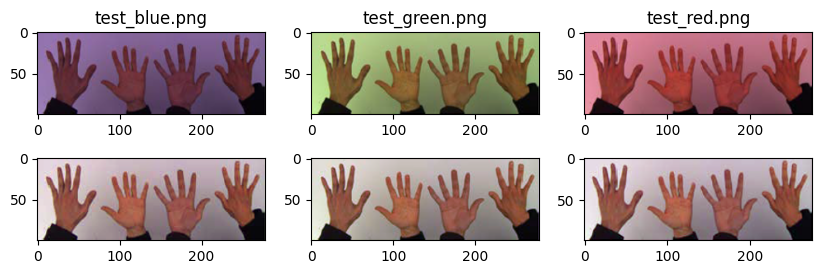

In [74]:
fig, axs = plt.subplots(nrows=2, ncols=len(TEST_IMAGES_FILENAMES))
fig.set_size_inches(10, 3)
for ax_raw, ax_wp, img_file in zip(axs[:][0], axs[:][1], TEST_IMAGES_FILENAMES):
    raw_img = mpimg.imread(TEST_IMAGE_ROOT_PATH + img_file)[:,:,:3]
    ax_raw.imshow(raw_img)
    ax_raw.set_title(img_file)
    ax_wp.imshow(white_patch(raw_img))

### Resultados
A continuación se obervan los resultados obtenidos con el algoritmo White-Patch implementado.

- En la primera fila se observan las imagenes originales utilizadas como entrada.
- En las filas siguientes se observan los resultados para White-Patch con diferentes percentiles.

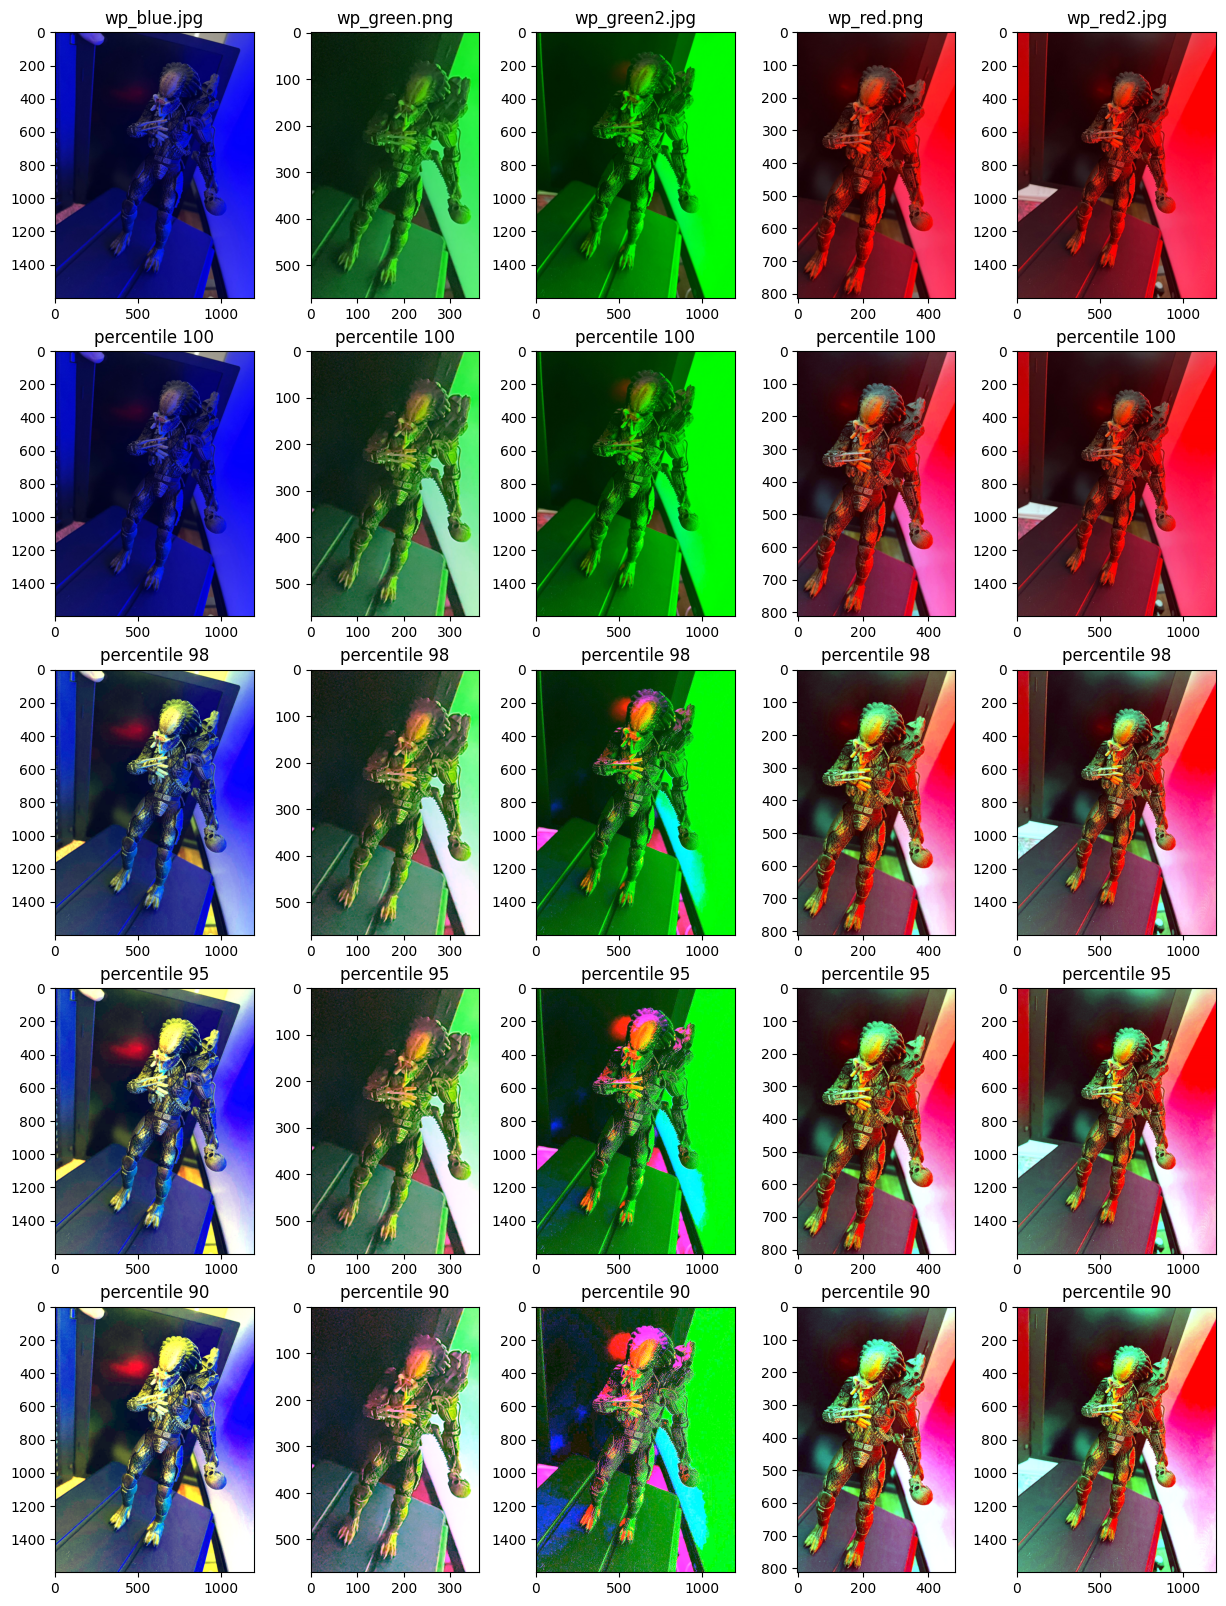

In [77]:
IMAGE_ROOT_PATH = "imgs/white_patch/"
IMAGES_FILENAMES = [
    "wp_blue.jpg",
    "wp_green.png",
    "wp_green2.jpg",
    "wp_red.png",
    "wp_red2.jpg",
]

WHITE_PATCH_PERCENTILES = [100, 98, 95, 90]

fig, axs = plt.subplots(
    nrows=len(WHITE_PATCH_PERCENTILES) + 1, ncols=len(IMAGES_FILENAMES)
)
fig.set_size_inches(15, 20)
for ax, img_file in zip(axs[:][0], IMAGES_FILENAMES):
    raw_img = mpimg.imread(IMAGE_ROOT_PATH + img_file)
    ax.imshow(raw_img)
    ax.set_title(img_file)

for idx, percentile in enumerate(WHITE_PATCH_PERCENTILES, start=1):
    for ax, img_file in zip(axs[:][idx], IMAGES_FILENAMES):
        raw_img = mpimg.imread(IMAGE_ROOT_PATH + img_file)
        if img_file.endswith(".jpg"):
            raw_img = raw_img[:, :, :3].astype(float) / 255
        else:
            raw_img = raw_img[:, :, :3]
        ax.imshow(white_patch(raw_img, percentile=percentile))
        ax.set_title(f"percentile {percentile}")

- Se puede observar que con percentil 100 (el valor por defecto) el algoritmo en general no logra recuperar la imágen. Esto es debido a que las imagenes se encuentran saturadas, a diferencia de las analizadas previamenter.
- Utilizando como máximo de cada canal el percentil 98 parece ser suficiente para recuperar la imagen de manera adecuada.
- Con percentiles menores la imagen resultante es muy distorsionada.